In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.ticker as mticker
from collections import Counter
import seaborn as sns

c:\Users\Admin\Desktop\my_project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = load_dataset('lukebarousse/data_jobs')

In [3]:
df = data['train'].to_pandas()

df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [45]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_posted_month'] = df['job_posted_date'].dt.month

In [56]:
count_job_posted = df['job_posted_month'].value_counts().sort_index()

count_job_posted.reset_index().set_index('job_posted_month')

count_job_posted = count_job_posted.rename('new_name', inplace=True).reset_index()

count_job_posted


,job_posted_month,new_name
0,1,91822
1,2,64578
2,3,64084
3,4,62919
4,5,52104
5,6,61572
6,7,63777
7,8,75162
8,9,62359
9,10,66611


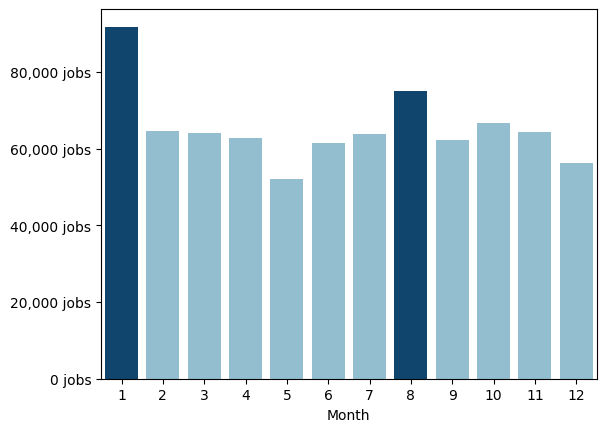

In [9]:

#Setting different colors for January and August bar:

palette1 = ['#01497C', '#89C2D9']

diff_colors = [1,0,0,0,0,0,0,1,0,0,0,0]

colors = [palette1[0] if diff_colors[i] == 1 else palette1[1] for i in range(len(diff_colors))]

colors

# Plotting:
fig, ax = plt.subplots()

sns.barplot(
    count_job_posted, 
    x=count_job_posted['job_posted_month'],
    y=count_job_posted['new_name'], 
    hue=count_job_posted['job_posted_month'], 
    legend=False,
    palette=colors
)

# Set formatter for y_axis:
formatter = mticker.FuncFormatter(lambda x, pos: f"{x:,.0f} jobs")
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel("Month")
plt.ylabel("")

plt.show()

In [10]:
df_median_salary_country = df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median'
)

df_median_salary_country

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


### Median Yearly Salary for top 6 popular Country

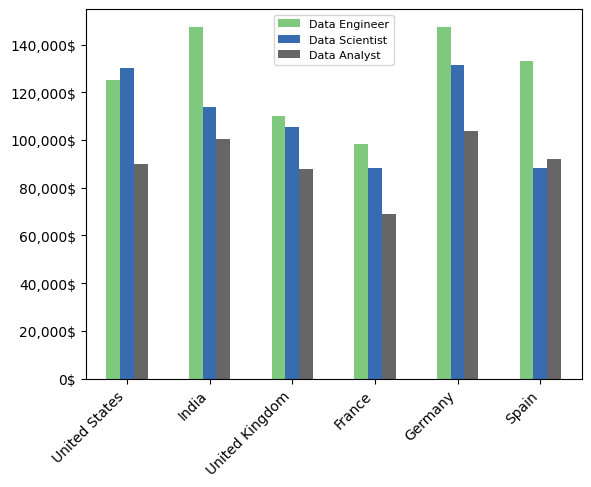

In [11]:
# Find top 6 popular country with highest number of job references
top6_country = df['job_country'].value_counts().head(6).index

top6_country

# Filter down by top 6 country and analysis wanted jobs.

job_filter = ['Data Engineer', 'Data Scientist', 'Data Analyst']

median_salary_top6 = df_median_salary_country.copy().loc[top6_country]

median_salary_top6[job_filter].plot(kind='bar', cmap='Accent')

salary_formatter = mticker.FuncFormatter(lambda x, pos: f"{x:,.0f}$")

plt.xticks(rotation=45, ha='right')
plt.xlabel("")
plt.gca().yaxis.set_major_formatter(salary_formatter)
plt.legend(fontsize=8)

plt.show()

## Insight về Data Job ở thị trường Việt Nam

In [12]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,6
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",8


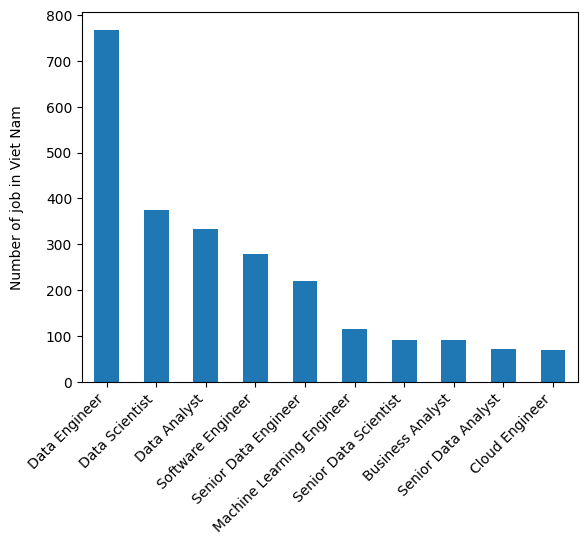

In [13]:
df_vietnam = (df[df['job_country'] == 'Vietnam']).copy()

df_vietnam.groupby('job_title_short')['job_title'].count().sort_values().plot(kind='bar')

# Adjust the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel("")
plt.ylabel('Number of job in Viet Nam\n')
plt.gca().invert_xaxis()

plt.show()

In [14]:
grouped_data = df_vietnam.groupby('job_title_short', as_index=False)['job_title'].count().sort_values(by='job_title')

grouped_data

,job_title_short,job_title
1,Cloud Engineer,70
6,Senior Data Analyst,71
0,Business Analyst,91
8,Senior Data Scientist,91
5,Machine Learning Engineer,115
7,Senior Data Engineer,220
9,Software Engineer,279
2,Data Analyst,334
4,Data Scientist,375
3,Data Engineer,768


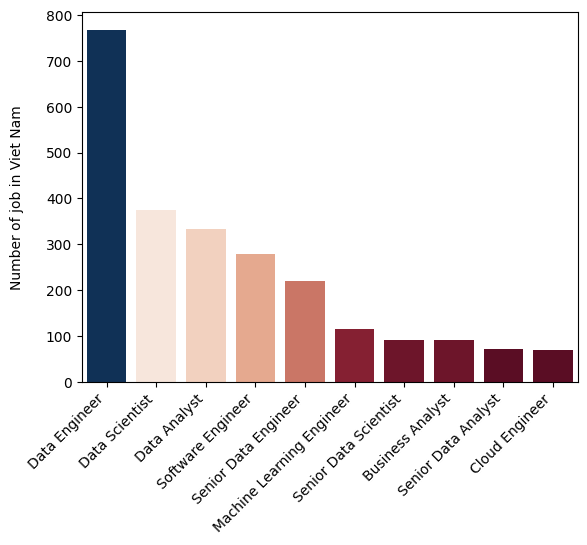

In [15]:
sns.barplot(grouped_data, x='job_title_short', y='job_title', hue='job_title', palette='RdBu')

ax = plt.gca()
ax.legend().remove()
plt.xticks(rotation=45, ha='right')
plt.xlabel("")
plt.ylabel('Number of job in Viet Nam\n')
plt.gca().invert_xaxis()

plt.show()

In [16]:
df_vietnam['job_posted_mth_title'] = df_vietnam['job_posted_date'].dt.strftime('%B')

df_vietnam.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_mth_title
1203,Data Engineer,"Expert, Data Engineering (40000062)","Hanoi, Hoàn Kiếm, Hanoi, Vietnam",via LinkedIn Vietnam,Full-time,False,Vietnam,2023-03-13 13:29:11,False,False,Vietnam,None,NaN,NaN,Techcombank (TCB),"['sql', 'nosql', 'python', 'r', 'scala', 'java...","{'analyst_tools': ['tableau'], 'libraries': ['...",3,March
2942,Cloud Engineer,Cyber Security Engineer,Anywhere,via Jobgether,Full-time,True,Vietnam,2023-08-27 13:20:43,True,False,Vietnam,None,NaN,NaN,Go1,"['python', 'bash', 'powershell', 'aws', 'azure...","{'cloud': ['aws', 'azure'], 'other': ['git', '...",8,August


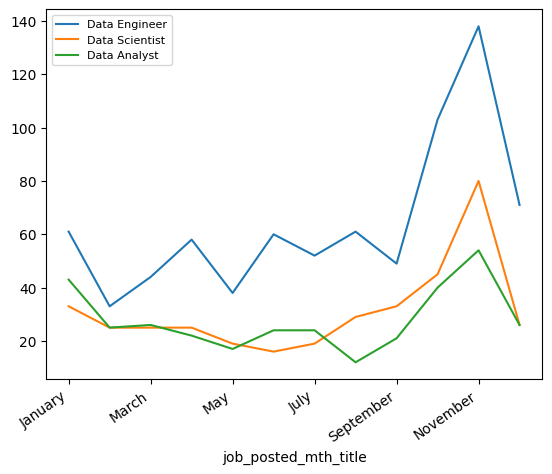

In [17]:
df_vietnam_filter = df_vietnam.pivot_table(
    values='job_posted_date',
    index=['job_posted_mth_title', 'job_posted_month'],
    columns='job_title_short',
    aggfunc='count'
)

df_vietnam_filter = df_vietnam_filter.sort_values(by='job_posted_month').droplevel('job_posted_month')

df_vietnam_filter[job_filter].plot()

plt.legend(fontsize=8)
plt.xticks(rotation=35, ha='right')

plt.show()

*Tháng cao điểm tuyển dụng của các công ty tại Việt Nam cho vị trí Data (Engineer, Scientist, Analyst) rơi vào tháng 11*<br>
*- Vị trí được tuyển dụng nhiều nhất trong 3 title trên là Data Engineer cho tất cả các tháng trong năm*

---

### How many data job on Vietnam market right now not require degree

*- Only about 856 (35.5%) job posted in Vietnam not require degree*

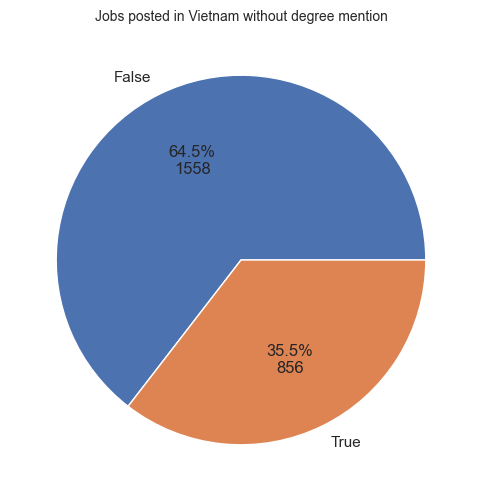

In [76]:
total = df_vietnam['job_no_degree_mention'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

df_vietnam['job_no_degree_mention'].value_counts().plot(kind='pie', autopct=fmt)

plt.title("Jobs posted in Vietnam without degree mention", fontsize=10)
plt.ylabel("")

plt.show()

Degree mention and Work From Home (WFH) offerred for **_Data Analyst_** Role in **_Viet Nam_**:

In [96]:
df_DA_VN = df_vietnam_indx[df_vietnam_indx['job_title_short'] == 'Data Analyst']

df_DA_VN.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_mth_title
3,Data Analyst,Chuyên Viên Phân Tích Dữ Liệu (Data Analyst),Vietnam,via Glints,Full-time,False,Vietnam,2023-10-18 13:29:13,True,False,Vietnam,None,NaN,NaN,Công ty Cổ phần Dịch vụ Giao Hàng Nhanh,"[sql, python, excel]","{'analyst_tools': ['excel'], 'programming': ['...",10,October
9,Data Analyst,Sales Data Analyst (Contractor),"Ho Chi Minh City, Vietnam",via Jobs.vn.indeed.com,Full-time and Contractor,False,Vietnam,2023-12-04 13:30:59,False,False,Vietnam,None,NaN,NaN,Sony Electronics Vietnam,"[sql, vba, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog...",12,December
14,Data Analyst,Marketing Data Analyst,"Ho Chi Minh City, Vietnam",via JobsGO,Full-time,False,Vietnam,2023-02-22 13:38:54,False,False,Vietnam,None,NaN,NaN,Công ty Cổ Phần YouNet,"[word, excel, powerpoint]","{'analyst_tools': ['word', 'excel', 'powerpoin...",2,February
29,Data Analyst,Junior Intelligence Analyst,Anywhere,via LinkedIn Vietnam,Full-time,True,Vietnam,2023-03-21 13:39:27,True,False,Vietnam,None,NaN,NaN,ActiveFence,[sheets],{'analyst_tools': ['sheets']},3,March
35,Data Analyst,[SO] Senior Data Analyst,Vietnam,via AI Careers,Full-time,False,Vietnam,2023-05-30 13:16:07,True,False,Vietnam,None,NaN,NaN,Bosch Group,None,None,5,May


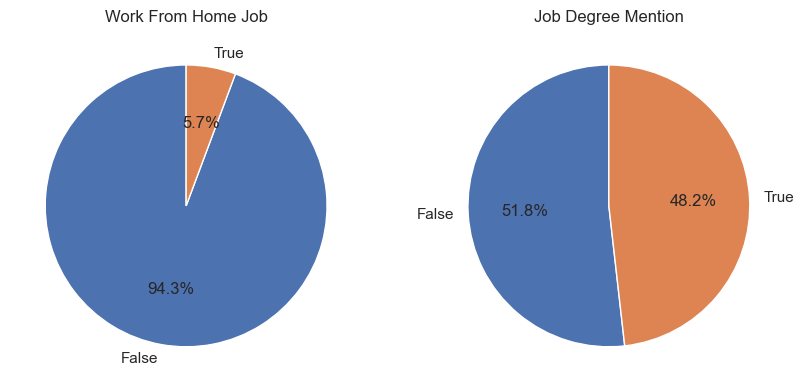

In [95]:
dict_columns = {
    'job_work_from_home': 'Work From Home Job',
    'job_no_degree_mention': 'Job Degree Mention'
    # 'job_health_insurance': 'Job Provide Insurance'
}

fig, ax = plt.subplots(1,2)

for i, (column, title) in enumerate(dict_columns.items()):
   ax[i].pie(df_DA_VN[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
   ax[i].set_title(title)

---

### Technical Skill phổ biến cho vị trí Data Analyst ở thị trường Việt Nam

In [19]:
df_vietnam.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_mth_title
1203,Data Engineer,"Expert, Data Engineering (40000062)","Hanoi, Hoàn Kiếm, Hanoi, Vietnam",via LinkedIn Vietnam,Full-time,False,Vietnam,2023-03-13 13:29:11,False,False,Vietnam,None,NaN,NaN,Techcombank (TCB),"['sql', 'nosql', 'python', 'r', 'scala', 'java...","{'analyst_tools': ['tableau'], 'libraries': ['...",3,March
2942,Cloud Engineer,Cyber Security Engineer,Anywhere,via Jobgether,Full-time,True,Vietnam,2023-08-27 13:20:43,True,False,Vietnam,None,NaN,NaN,Go1,"['python', 'bash', 'powershell', 'aws', 'azure...","{'cloud': ['aws', 'azure'], 'other': ['git', '...",8,August
3016,Data Scientist,CI/XAB - Big data Hadoop developer,Vietnam,via Ai-Jobs.net,Full-time,False,Vietnam,2023-01-06 13:45:37,False,False,Vietnam,year,50400.0,NaN,Bosch Group,"['java', 'hadoop', 'spark', 'unix', 'sap', 'ya...","{'analyst_tools': ['sap'], 'libraries': ['hado...",1,January
3056,Data Analyst,Chuyên Viên Phân Tích Dữ Liệu (Data Analyst),Vietnam,via Glints,Full-time,False,Vietnam,2023-10-18 13:29:13,True,False,Vietnam,None,NaN,NaN,Công ty Cổ phần Dịch vụ Giao Hàng Nhanh,"['sql', 'python', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",10,October
3541,Data Engineer,Data Engineer,"Da Nang, Hải Châu District, Da Nang, Vietnam",via Jobs.vn.indeed.com,Full-time and Part-time,False,Vietnam,2023-11-22 13:59:18,False,False,Vietnam,None,NaN,NaN,Vinova Pte. Ltd,"['bash', 'python', 'java', 'sql', 'postgresql'...","{'databases': ['postgresql', 'mysql', 'elastic...",11,November


In [20]:
df_vietnam_indx = df_vietnam.reset_index().copy()

df_vietnam_indx.drop('index', axis=1, inplace=True)

type(df_vietnam_indx['job_skills'][0])

str

In [21]:
import json
import ast

def skill_lists(skill):
    if pd.notna(skill):
        return ast.literal_eval(skill)

In [22]:
df_vietnam_indx['job_skills'] = df_vietnam_indx['job_skills'].apply(skill_lists)

In [23]:
df_exploded = df_vietnam_indx.explode('job_skills')

df_group = df_exploded.groupby(['job_title_short', 'job_skills']).size().reset_index(name='skill_count').sort_values(by='skill_count', ascending=False)

df_group

,job_title_short,job_skills,skill_count
319,Data Engineer,sql,477
293,Data Engineer,python,468
315,Data Engineer,spark,282
257,Data Engineer,java,231
406,Data Scientist,python,230
...,...,...,...
16,Business Analyst,github,1
797,Software Engineer,qt,1
812,Software Engineer,sheets,1
814,Software Engineer,slack,1


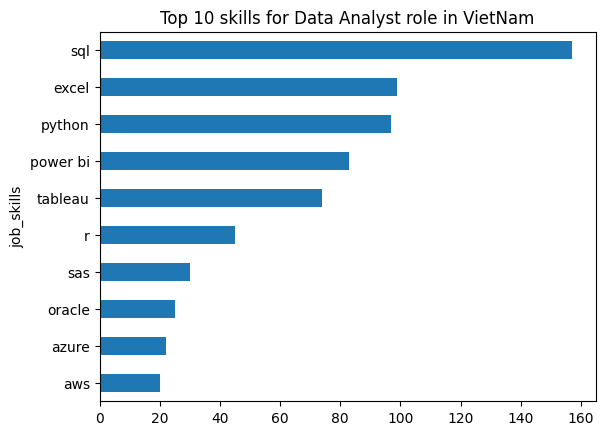

In [24]:
job_title = 'Data Analyst'
top_skills = 10

df_skill_final = df_group[df_group['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')

plt.gca().invert_yaxis()
plt.legend().set_visible(False)
plt.title(f"Top {top_skills} skills for {job_title} role in VietNam")

plt.show()

In [25]:
df_vietnam.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_mth_title
1203,Data Engineer,"Expert, Data Engineering (40000062)","Hanoi, Hoàn Kiếm, Hanoi, Vietnam",via LinkedIn Vietnam,Full-time,False,Vietnam,2023-03-13 13:29:11,False,False,Vietnam,None,NaN,NaN,Techcombank (TCB),"['sql', 'nosql', 'python', 'r', 'scala', 'java...","{'analyst_tools': ['tableau'], 'libraries': ['...",3,March
2942,Cloud Engineer,Cyber Security Engineer,Anywhere,via Jobgether,Full-time,True,Vietnam,2023-08-27 13:20:43,True,False,Vietnam,None,NaN,NaN,Go1,"['python', 'bash', 'powershell', 'aws', 'azure...","{'cloud': ['aws', 'azure'], 'other': ['git', '...",8,August


In [26]:
df_pivot = df_exploded.pivot_table(
    index= ['job_posted_mth_title', 'job_posted_month'],
    columns= 'job_skills',
    aggfunc='size',
    fill_value=0
).copy()

In [27]:
df_pivot_sorted = df_pivot.sort_values(by='job_posted_month').droplevel('job_posted_month').copy()

In [28]:
df_pivot_sorted.loc['Total'] = df_pivot_sorted.sum()

df_pivot_narrow = df_pivot_sorted[df_pivot_sorted.loc['Total'].sort_values(ascending=False).index[0:5]].copy()

In [29]:
df_pivot_narrow.drop('Total', inplace=True)

In [30]:
df_pivot_narrow

job_skills,python,sql,spark,java,aws
job_posted_mth_title,,,,,
January,99,79,41,36,32
February,68,64,30,28,15
March,67,68,35,25,23
April,63,64,30,28,25
May,51,48,30,20,19
June,91,82,46,45,33
July,76,67,24,23,26
August,96,85,36,28,32
September,88,78,43,30,43


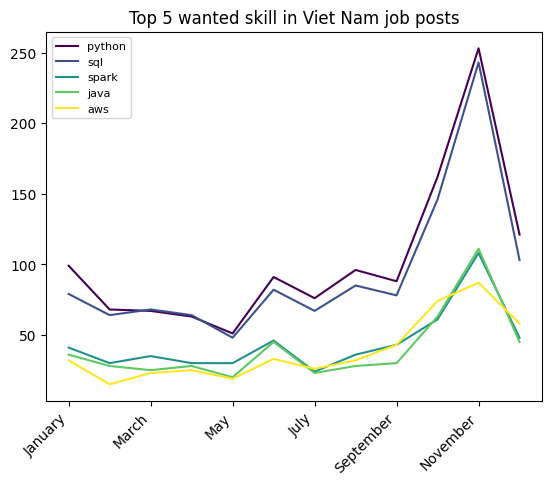

In [31]:
df_pivot_narrow.plot(kind='line', cmap='viridis')
plt.legend(fontsize= 8)
plt.xlabel("")
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 wanted skill in Viet Nam job posts')

plt.show()

In [32]:
df_group

,job_title_short,job_skills,skill_count
319,Data Engineer,sql,477
293,Data Engineer,python,468
315,Data Engineer,spark,282
257,Data Engineer,java,231
406,Data Scientist,python,230
...,...,...,...
16,Business Analyst,github,1
797,Software Engineer,qt,1
812,Software Engineer,sheets,1
814,Software Engineer,slack,1


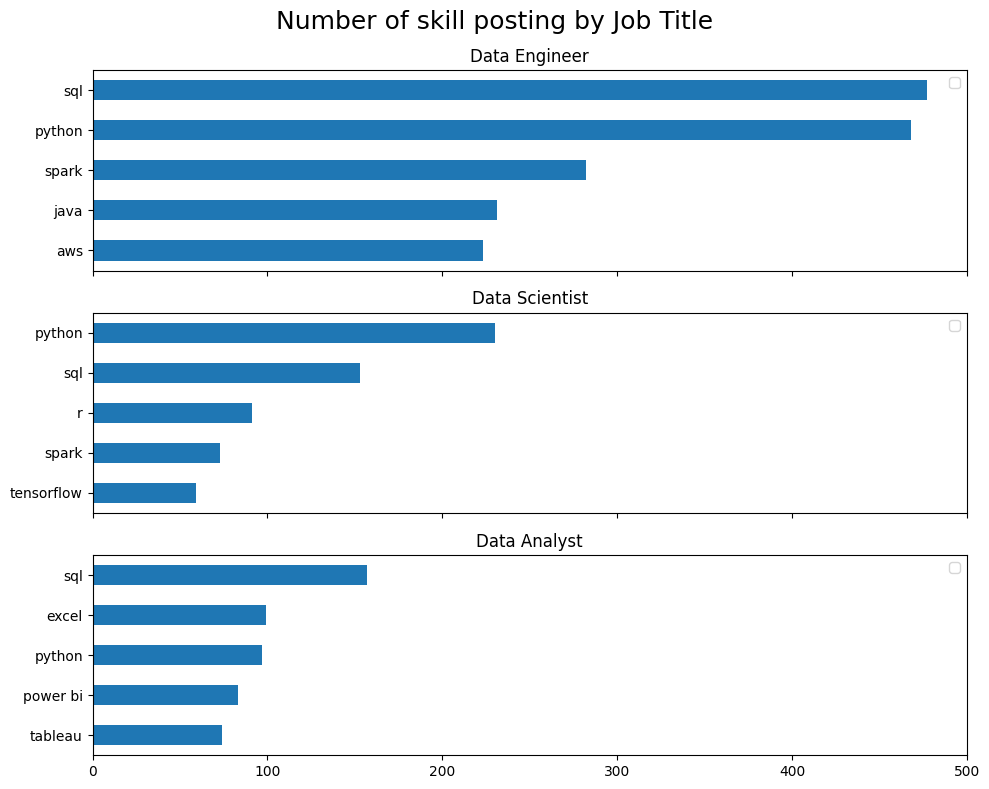

In [33]:
fig, ax = plt.subplots(3,1, figsize=(10,8), sharex=True)

job_filter

for i, job_title in enumerate(job_filter):
    df_plot = df_group[df_group['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', ax=ax[i], x='job_skills', y='skill_count', title=job_title)
    
    ax[i].invert_yaxis()
    ax[i].legend("")
    ax[i].set_ylabel("")
    ax[i].set_xlim(0,500)

fig.suptitle("Number of skill posting by Job Title", fontsize=18)    
fig.tight_layout()

In [34]:
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_mth_title
0,Data Engineer,"Expert, Data Engineering (40000062)","Hanoi, Hoàn Kiếm, Hanoi, Vietnam",via LinkedIn Vietnam,Full-time,False,Vietnam,2023-03-13 13:29:11,False,False,Vietnam,None,NaN,NaN,Techcombank (TCB),sql,"{'analyst_tools': ['tableau'], 'libraries': ['...",3,March
0,Data Engineer,"Expert, Data Engineering (40000062)","Hanoi, Hoàn Kiếm, Hanoi, Vietnam",via LinkedIn Vietnam,Full-time,False,Vietnam,2023-03-13 13:29:11,False,False,Vietnam,None,NaN,NaN,Techcombank (TCB),nosql,"{'analyst_tools': ['tableau'], 'libraries': ['...",3,March
0,Data Engineer,"Expert, Data Engineering (40000062)","Hanoi, Hoàn Kiếm, Hanoi, Vietnam",via LinkedIn Vietnam,Full-time,False,Vietnam,2023-03-13 13:29:11,False,False,Vietnam,None,NaN,NaN,Techcombank (TCB),python,"{'analyst_tools': ['tableau'], 'libraries': ['...",3,March
0,Data Engineer,"Expert, Data Engineering (40000062)","Hanoi, Hoàn Kiếm, Hanoi, Vietnam",via LinkedIn Vietnam,Full-time,False,Vietnam,2023-03-13 13:29:11,False,False,Vietnam,None,NaN,NaN,Techcombank (TCB),r,"{'analyst_tools': ['tableau'], 'libraries': ['...",3,March
0,Data Engineer,"Expert, Data Engineering (40000062)","Hanoi, Hoàn Kiếm, Hanoi, Vietnam",via LinkedIn Vietnam,Full-time,False,Vietnam,2023-03-13 13:29:11,False,False,Vietnam,None,NaN,NaN,Techcombank (TCB),scala,"{'analyst_tools': ['tableau'], 'libraries': ['...",3,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,Data Engineer,Data Engineer,"Ho Chi Minh City, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-17 06:23:18,False,False,Vietnam,None,NaN,NaN,Fram^,nosql,"{'databases': ['postgresql', 'mysql'], 'librar...",12,December
2413,Data Engineer,Data Engineer,"Ho Chi Minh City, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-17 06:23:18,False,False,Vietnam,None,NaN,NaN,Fram^,postgresql,"{'databases': ['postgresql', 'mysql'], 'librar...",12,December
2413,Data Engineer,Data Engineer,"Ho Chi Minh City, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-17 06:23:18,False,False,Vietnam,None,NaN,NaN,Fram^,mysql,"{'databases': ['postgresql', 'mysql'], 'librar...",12,December
2413,Data Engineer,Data Engineer,"Ho Chi Minh City, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-17 06:23:18,False,False,Vietnam,None,NaN,NaN,Fram^,spark,"{'databases': ['postgresql', 'mysql'], 'librar...",12,December


In [35]:
from matplotlib.ticker import FuncFormatter

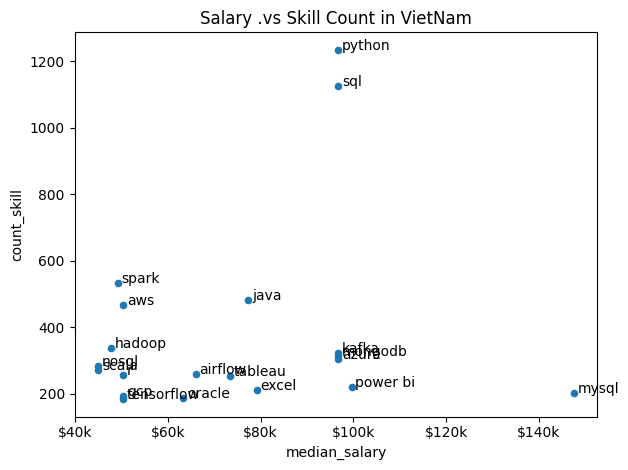

In [36]:
df_scatter = df_exploded.groupby('job_skills').agg(
    count_skill = ('job_skills', 'size'),
    median_salary = ('salary_year_avg', 'median')
)

fmt_currency_thousand = FuncFormatter(lambda x, pos: f'${int(x/1000)}k')

df_scatter_top10 = df_scatter.sort_values(by='count_skill', ascending=False).head(20)

df_scatter_top10.plot(kind='scatter', x='median_salary', y='count_skill')

plt.title('Salary .vs Skill Count in VietNam')

for i, txt in enumerate(df_scatter_top10.index):
    plt.text(x=(df_scatter_top10['median_salary'].iloc[i] + 800), y=df_scatter_top10['count_skill'].iloc[i], s=txt)

ax = plt.gca()

ax.xaxis.set_major_formatter(fmt_currency_thousand)

plt.tight_layout()    
plt.show()



In [37]:
df_scatter_top10

,count_skill,median_salary
job_skills,,
python,1235,96773.0
sql,1127,96773.0
spark,532,49200.0
java,482,77375.0
aws,467,50400.0
hadoop,338,47700.0
kafka,322,96773.0
mongodb,314,96773.0
azure,306,96773.0


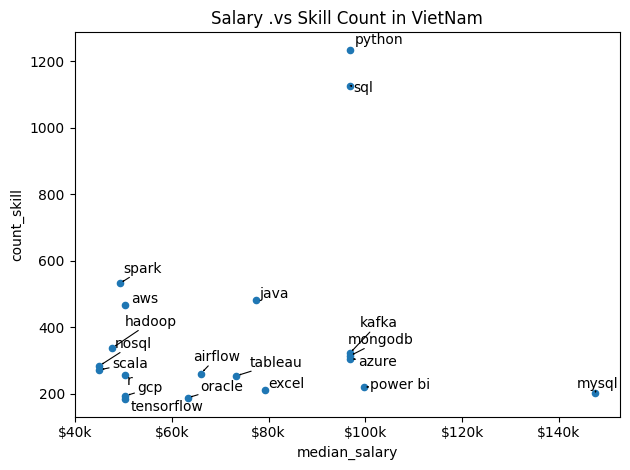

In [38]:
from adjustText import adjust_text

fig, ax = plt.subplots()

df_scatter_top10.plot(kind='scatter', x='median_salary', y='count_skill', ax=ax)

# ax = plt.gca()

plt.title('Salary .vs Skill Count in VietNam')

texts = []
for i, txt in enumerate(df_scatter_top10.index):
    texts.append(plt.text(x=(df_scatter_top10['median_salary'].iloc[i]), y=df_scatter_top10['count_skill'].iloc[i], s=txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', linewidth=0.8))

ax.xaxis.set_major_formatter(fmt_currency_thousand)

plt.tight_layout()    
plt.show()



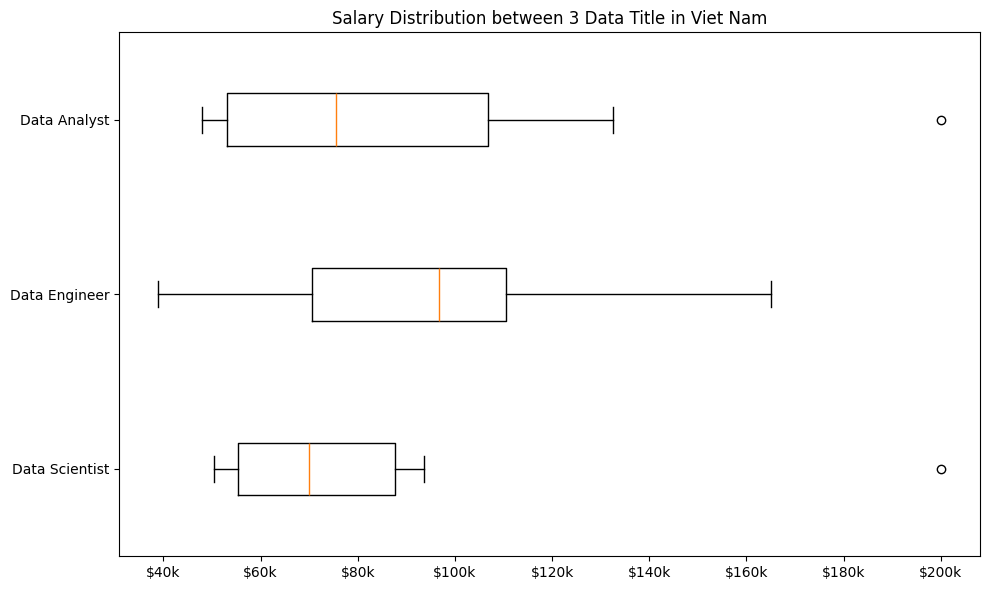

In [39]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']
plt.figure(figsize=(10,6))

df_VN = df_vietnam[df_vietnam['job_title_short'].isin(job_titles)]
df_VN_non_na = df_VN.dropna(subset='salary_year_avg')

job_list = [df_VN_non_na[df_VN_non_na['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels=job_titles, vert=False)

ax = plt.gca()
ax.xaxis.set_major_formatter(fmt_currency_thousand)

plt.title('Salary Distribution between 3 Data Title in Viet Nam')
plt.tight_layout()
plt.show()

In [40]:
#Global figsize for seaborn plot

sns.set_theme(rc={'figure.figsize': (10, 6)})

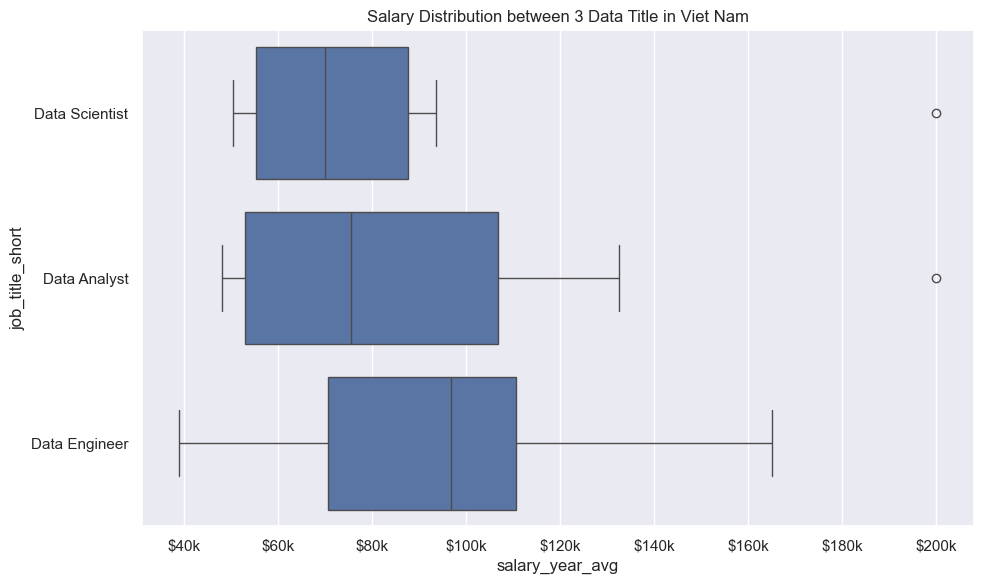

In [41]:
sns.boxplot(data=df_VN_non_na, x='salary_year_avg', y='job_title_short')

ax = plt.gca()
ax.xaxis.set_major_formatter(fmt_currency_thousand)

plt.title('Salary Distribution between 3 Data Title in Viet Nam')
plt.tight_layout()
plt.show()

In [42]:
df_VN_non_na.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_mth_title
3016,Data Scientist,CI/XAB - Big data Hadoop developer,Vietnam,via Ai-Jobs.net,Full-time,False,Vietnam,2023-01-06 13:45:37,False,False,Vietnam,year,50400.0,NaN,Bosch Group,"['java', 'hadoop', 'spark', 'unix', 'sap', 'ya...","{'analyst_tools': ['sap'], 'libraries': ['hado...",1,January
134303,Data Analyst,Data Analyst Team Leader,"Hanoi, Hoàn Kiếm, Hanoi, Vietnam",via Ai-Jobs.net,Full-time,False,Vietnam,2023-02-15 08:34:55,True,False,Vietnam,year,111175.0,NaN,Ninja Van,"['sql', 'power bi']","{'analyst_tools': ['power bi'], 'programming':...",2,February
140484,Data Scientist,Data Scientist (Mid/Sr),Vietnam,via Ai-Jobs.net,Full-time,False,Vietnam,2023-09-06 08:35:27,False,False,Vietnam,year,70000.0,NaN,SmartDev,"['python', 'c']","{'programming': ['python', 'c']}",9,September
140810,Data Engineer,BD/XAB Data Architect,Vietnam,via Ai-Jobs.net,Full-time,False,Vietnam,2023-04-12 08:28:17,False,False,Vietnam,year,165000.0,NaN,Bosch Group,"['java', 'hadoop', 'sap', 'flow']","{'analyst_tools': ['sap'], 'libraries': ['hado...",4,April
141741,Data Scientist,Research Engineer - Data Science,"Ho Chi Minh City, Vietnam",via Ai-Jobs.net,Full-time,False,Vietnam,2023-02-06 08:41:53,False,False,Vietnam,year,200000.0,NaN,Trusting Social,"['python', 'c++', 'java', 'javascript', 'tenso...","{'libraries': ['tensorflow', 'pytorch', 'mxnet...",2,February


In [43]:
df_exploded_nna = df_exploded.dropna(subset='salary_year_avg')

df_skill_group = df_exploded_nna.groupby('job_skills').agg(
    median_salary= ('salary_year_avg', 'median'),
    skill_counts= ('job_skills', 'count')
)

top10_median_salary_sorted = df_skill_group.sort_values(by='median_salary', ascending=False).head(10)

top10_in_demand_skills = df_skill_group.sort_values(by='skill_counts', ascending=False).head(10).sort_values(by='median_salary', ascending=False).head(10)



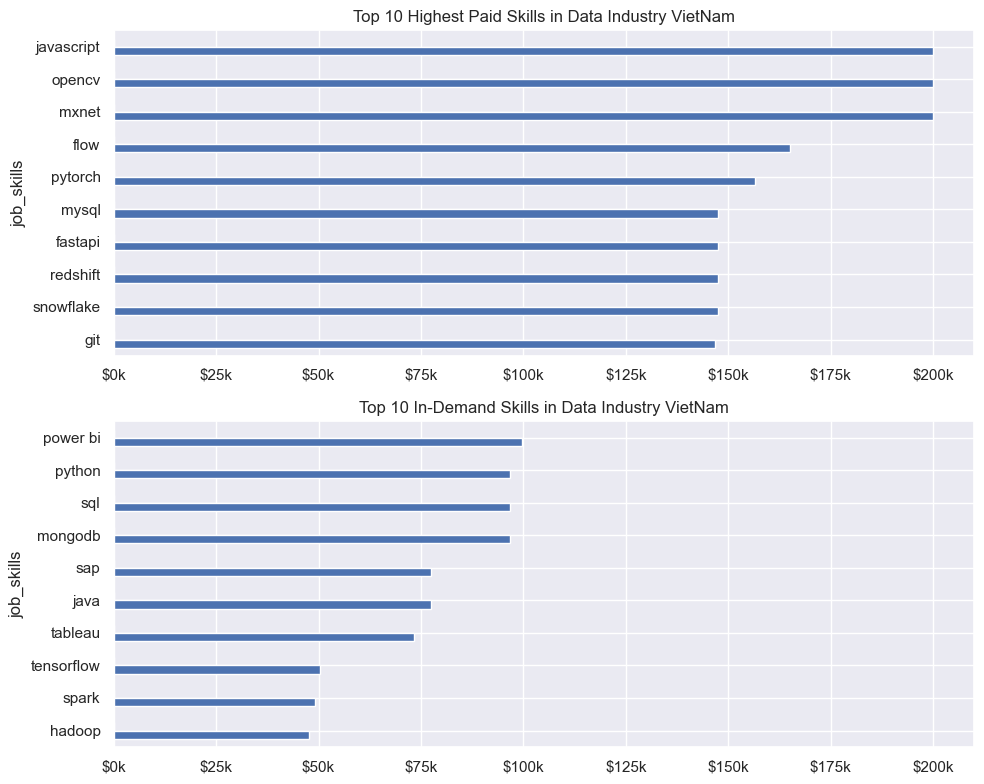

In [44]:
fig, ax = plt.subplots(2,1, figsize=(10,8))

top10_median_salary_sorted[::-1].plot(kind='barh', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills in Data Industry VietNam')
ax[0].xaxis.set_major_formatter(fmt_currency_thousand)

top10_in_demand_skills[::-1].plot(kind='barh', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim()) # type: ignore
ax[1].set_title('Top 10 In-Demand Skills in Data Industry VietNam')
ax[1].xaxis.set_major_formatter(fmt_currency_thousand)

plt.tight_layout()
plt.show()